In [1]:
import re

import matplotlib.pyplot as plt
import pyopenms as oms
from MetaMSTools.ms_tools import (
    AdductDetector,
    AdductDetectorConfig,
    FeatureFinder,
    FeatureFinderConfig,
    FeatureLinker,
    OpenMSDataWrapper,
    RTAligner,
    TICSmoother,
)


def plot_2d_line_chart(x_data, y_data, title='XIC', x_label='RT', y_label='I'):
    """
    绘制二维折线图

    参数:
    x_data (list or array-like): X轴数据
    y_data (list or array-like): Y轴数据
    title (str): 图表标题
    x_label (str): X轴标签
    y_label (str): Y轴标签
    """
    plt.figure(figsize=(10, 6))  # 设置图形大小
    plt.plot(x_data, y_data, marker='o', linestyle='-', markersize=0.5)  # 绘制折线图
    plt.title(title)  # 设置标题
    plt.xlabel(x_label)  # 设置X轴标签
    plt.ylabel(y_label)  # 设置Y轴标签
    plt.grid(True)  # 显示网格
    plt.show()  # 显示图表

def print_meta_data(x):
    keys = []
    x.getKeys(keys)
    for key in keys:
        print(f"{key}: {x.getMetaValue(key)}")

def extract_scan_value(s):
    # 使用正则表达式匹配 'scan=' 后面的数值
    match = re.search(r'scan=(\d+)', s)
    if match:
        # 提取匹配的数值
        scan_value = match.group(1)
        return scan_value
    return None

In [4]:
qc_datas = OpenMSDataWrapper(
    file_paths=[
        "../data/raw_files/QC1.mzML",
        "../data/raw_files/QC2.mzML"
    ]
)
qc_datas.init_exps()
qc_datas = TICSmoother()(qc_datas)
feature_config = FeatureFinderConfig()
feature_config.feature_finding_metabo.charge_upper_bound = 1
feature_config.feature_finding_metabo.charge_lower_bound = 1
qc_datas = FeatureFinder(config=feature_config)(qc_datas)
qc_datas.ref_for_align = qc_datas.features[0]
qc_datas = RTAligner()(qc_datas)
qc_datas = FeatureLinker()(qc_datas)
adduct_config = AdductDetectorConfig(
    charge_min=1,
    charge_max=1,
)
qc_datas = AdductDetector(
    config=adduct_config
)(qc_datas)

Progress of 'mass trace detection':
-- done [took 4.32 s (CPU), 0.27 s (Wall)] -- 
Progress of 'mass trace detection':
-- done [took 0.19 s (CPU), 0.20 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 1.22 s (CPU), 0.04 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 5.28 s (CPU), 0.17 s (Wall)] -- 
Progress of 'assembling mass traces to features':
Loading metabolite isotope model with 5% RMS error
-- done [took 1.50 s (CPU), 0.05 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 2.38 s (CPU), 0.07 s (Wall)] -- 
Progress of 'Linking features':
-- done [took 0.78 s (CPU), 0.03 s (Wall)] -- 
Adding neutral: ---------- Adduct -----------------
Charge: 0
Amount: 1
MassSingle: 13.9793
Formula: H-2O1
log P: -2.30259

MassExplainer table size: 92
Generating Masses with threshold: -6.90776 ...
<Loading metabolite isotope model with 5% RMS error> occurred 2 times
done
0 of 13 valid net charge compomer results did not pass the featur

/__w/OpenMS/OpenMS/OpenMS/src/openms/source/DATASTRUCTURES/MassExplainer.cpp: Warning! "max_span_ > (q_max - q_min + 1)" needed fixing!
/__w/OpenMS/OpenMS/OpenMS/src/openms/source/DATASTRUCTURES/MassExplainer.cpp: Warning! "max_span_ > (q_max - q_min + 1)" needed fixing!


In [40]:
qc_datas.features[0].get_df().loc['1570089668586261424']

peptide_sequence          None
peptide_score              NaN
ID_filename               None
ID_native_id              None
charge                       1
RT                   353.75811
mz                  207.159059
RTstart             351.312394
RTend               372.129225
MZstart             207.159012
MZend               209.163223
quality               0.000181
intensity            5035236.5
Name: 1570089668586261424, dtype: object

In [ ]:
for f in qc_datas.features[0]:
    pass

In [28]:
print_meta_data(qc_datas.features[0][0])

b'label': T76.1_T1299.1
b'FWHM': 16.046035766601562
b'max_height': 7602.8310546875
b'num_of_masstraces': 2
b'masstrace_intensity': [104382.56901742799, 26270.711776079377]
b'masstrace_centroid_rt': [215.297829439, 201.837871663]
b'masstrace_centroid_mz': [445.9023765032118, 446.90209485271885]
b'isotope_distances': [0.9997183495070203]
b'legal_isotope_pattern': 1
b'original_RT': 215.297829439
b'dc_charge_adducts': H1
b'dc_charge_adduct_mass': 1.007276466771
b'Group': 17266421853163197283
b'is_ungrouped_with_charge': 1


In [42]:
qc_datas.features[0][0].getAnnotationState()

0

In [153]:
qc_datas.consensus_map[0].getFeatureList()

In [37]:
qc_datas.consensus_map[0].getFeatureList()[0].getUniqueId()

1570089668586261424

In [62]:
len(qc_datas.chromatogram_peaks[0])

75

In [63]:
qc_datas.features[0].size()

75

In [118]:
qc_datas.chromatogram_peaks[0][0][0].getPrecursor().getMZ()

460.33057618727497

In [130]:
qc_datas.chromatogram_peaks[0][0][2].getNativeID()

'11695393187689330579_2'

In [ ]:
qc_datas.features[0].get_df()

,peptide_sequence,peptide_score,ID_filename,ID_native_id,charge,RT,mz,RTstart,RTend,MZstart,MZend,quality,intensity
feature_id,,,,,,,,,,,,,
17436269410160739668,None,NaN,None,None,1,215.297829,445.902377,200.639135,219.024031,445.902130,446.902557,0.000003,1.043826e+05
9937201025283278962,None,NaN,None,None,1,231.165850,252.181906,228.764020,244.602789,252.181808,253.185608,0.000053,1.539104e+06
7968147542342305831,None,NaN,None,None,1,233.607953,344.228028,221.427610,247.019714,344.226501,345.231903,0.000007,1.974188e+05
3756634569446296610,None,NaN,None,None,1,243.397189,300.203077,240.991180,256.907567,300.202606,301.206665,0.000056,1.728374e+06
7974687651148565070,None,NaN,None,None,1,244.602789,297.190903,240.991180,255.663630,297.190704,298.194336,0.000007,2.255495e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339186262823338694,None,NaN,None,None,1,551.715149,579.064319,546.777566,567.546010,579.063843,580.067810,0.000003,7.300085e+04
13129169421531824185,None,NaN,None,None,1,565.102578,671.789106,556.653791,577.414497,671.787720,672.792969,0.000004,1.122403e+05
6129244184927097252,None,NaN,None,None,1,572.526729,598.411930,565.102578,578.617109,598.411560,599.415588,0.000002,5.571515e+04


In [143]:
qc_datas.features[0][12].getConvexHull().getHullPoints()

array([[288.91916, 460.32974],
       [384.24164, 460.32974],
       [384.24164, 462.33737],
       [288.91916, 462.33737]], dtype=float32)

In [140]:
qc_datas.features[0][12].getConvexHulls()[1].getHullPoints()

array([[288.91916, 461.33383],
       [290.0711 , 461.33444],
       [291.20312, 461.33368],
       [292.3536 , 461.33398],
       [293.42017, 461.3331 ],
       [294.5702 , 461.33243],
       [295.72577, 461.33398],
       [296.83878, 461.33487],
       [295.72577, 461.33398],
       [294.5702 , 461.33243],
       [293.42017, 461.3331 ],
       [292.3536 , 461.33398],
       [291.20312, 461.33368],
       [290.0711 , 461.33444]], dtype=float32)

In [141]:
qc_datas.chromatogram_peaks[0][0][1].get_peaks()

(array([288.91915456, 290.07110693, 291.20313762, 292.35360278,
        293.42017435, 294.57019488, 295.72577677, 296.83878923]),
 array([2.5455334e+05, 3.9819396e+07, 3.4228484e+07, 1.5216352e+08,
        8.0028648e+07, 4.3844724e+07, 1.6497330e+07, 6.5507090e+06],
       dtype=float32))

In [60]:
qc_datas.exps[0].get_massql_df()[0]

,i,i_norm,i_tic_norm,mz,scan,rt,polarity
0,4236.865234,0.039261,0.001070,200.091660,3,3.343986,1
1,2695.840576,0.024981,0.000681,200.128098,3,3.343986,1
2,6285.765625,0.058247,0.001587,200.172775,3,3.343986,1
3,11543.618164,0.106968,0.002914,200.183792,3,3.343986,1
4,15958.017578,0.147874,0.004029,200.200943,3,3.343986,1
...,...,...,...,...,...,...,...
259199,2920.090332,0.040915,0.000783,797.680359,1052,9.985891,1
259200,2668.782715,0.037394,0.000716,797.904968,1052,9.985891,1
259201,2438.909424,0.034173,0.000654,798.186646,1052,9.985891,1
259202,2471.288086,0.034627,0.000663,798.975037,1052,9.985891,1


In [ ]:
qc_datas.exps[0].get_massql_df().to_tiledb

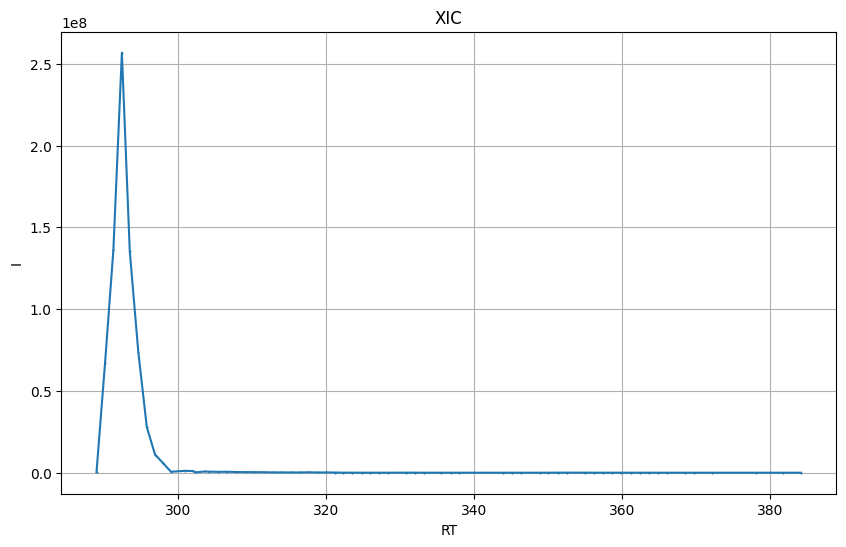

In [108]:
plot_2d_line_chart(*qc_datas.chromatogram_peaks[0][0][0].get_peaks())

In [182]:
qc_datas.exps[0].get_massql_df()[0]

,i,i_norm,i_tic_norm,mz,scan,rt,polarity
0,4236.865234,0.039261,0.001070,200.091660,3,3.343986,1
1,2695.840576,0.024981,0.000681,200.128098,3,3.343986,1
2,6285.765625,0.058247,0.001587,200.172775,3,3.343986,1
3,11543.618164,0.106968,0.002914,200.183792,3,3.343986,1
4,15958.017578,0.147874,0.004029,200.200943,3,3.343986,1
...,...,...,...,...,...,...,...
259199,2920.090332,0.040915,0.000783,797.680359,1052,9.985891,1
259200,2668.782715,0.037394,0.000716,797.904968,1052,9.985891,1
259201,2438.909424,0.034173,0.000654,798.186646,1052,9.985891,1
259202,2471.288086,0.034627,0.000663,798.975037,1052,9.985891,1


In [190]:
qc_datas.exps[0].get_massql_df()[1]

,i,i_norm,i_tic_norm,mz,scan,rt,polarity,precmz,ms1scan,charge
0,2170.664795,1.000000,1.000000,200.683197,1,3.334743,1,173.128479,0,1
1,3391.868408,0.402510,0.203830,212.950302,2,3.339176,1,233.128433,0,1
2,8426.791016,1.000000,0.506398,216.101776,2,3.339176,1,233.128433,0,1
3,4821.996582,0.572222,0.289772,233.128708,2,3.339176,1,233.128433,0,1
4,2566.662598,0.134708,0.086777,202.979721,4,3.359158,1,207.985245,3,1
...,...,...,...,...,...,...,...,...,...,...
6078,2885.548584,0.515410,0.143059,355.069611,1047,9.956603,1,371.315826,1043,1
6079,11006.429688,1.000000,1.000000,224.128311,1049,9.971818,1,224.128128,1045,1
6080,5839.043945,1.000000,0.576509,216.101868,1050,9.976606,1,233.128494,1045,1
6081,4289.237305,0.734579,0.423491,233.127686,1050,9.976606,1,233.128494,1045,1


In [3]:
print_meta_data(qc_datas.exps[0][5])

b'total ion current': 206777.0
b'base peak m/z': 165.054580688477
b'base peak intensity': 57772.61328125
b'lowest observed m/z': 88.989128112793
b'highest observed m/z': 229.219146728516
b'filter string': FTMS + c ESI d Full ms2 224.1281@hcd30.00 [75.0000-235.0000]
b'original_RT': 202.193326271


In [4]:
print_meta_data(qc_datas.exps[0][4])

b'total ion current': 13197752.0
b'base peak m/z': 131.117919921875
b'base peak intensity': 1122290.875
b'lowest observed m/z': 100.296485900879
b'highest observed m/z': 999.353515625
b'filter string': FTMS + p ESI Full ms [100.0000-1000.0000]
b'original_RT': 201.837871663


In [228]:
qc_datas.exps[0][5].getRT()

202.19332627099993

In [229]:
qc_datas.exps[0][5].getPrecursors()[0].getMZ()

224.128128051758

In [232]:
qc_datas.exps[0][5].getNativeID()

'controllerType=0 controllerNumber=1 scan=804'

In [230]:
qc_datas.exps[0][5].get_peaks()

(array([203.7797699 , 224.12812805, 229.21914673]),
 array([ 2704.0513, 19318.791 ,  2518.6877], dtype=float32))

In [186]:
qc_datas.exps[0].size()

1052

In [ ]:
import numpy as np

len(
    np.unique(
        qc_datas.exps[0].get_massql_df()[0]['scan'].tolist() + \
            qc_datas.exps[0].get_massql_df()[1]['scan'].tolist()
    )
)

1052

In [199]:
qc_datas.mass_traces[0][0].getConvexhull().getHullPoints()

array([[557.81024, 675.1134 ],
       [560.255  , 675.113  ],
       [561.4547 , 675.1133 ],
       [565.1026 , 675.113  ],
       [561.4547 , 675.1133 ],
       [560.255  , 675.113  ]], dtype=float32)

In [234]:
from rtree import index
from tqdm import tqdm

In [261]:
r = index.Index()
for i, spec in enumerate(tqdm(qc_datas.exps[0],total=qc_datas.exps[0].size())):
    precursors = spec.getPrecursors()
    if len(precursors) > 0:
        p_mz = precursors[0].getMZ()
        rt = spec.getRT()
        scan_id = int(extract_scan_value(spec.getNativeID()))
        peak_id = f"{qc_datas.exp_names[0]}::{scan_id}"
        r.insert(
            id=i,
            coordinates=(p_mz, rt, p_mz, rt),
            obj=peak_id
        )

100%|██████████| 1052/1052 [00:00<00:00, 28902.55it/s]


In [265]:
query_rect = qc_datas.features[0].get_df()[[
    'MZstart',
    'RTstart',
    'MZend',
    'RTend',
]].iloc[12]

In [268]:
query_rect = tuple(qc_datas.features[0].get_df()[[
    'MZstart',
    'RTstart',
    'MZend',
    'RTend',
]].iloc[12])
matching_ids = list(r.intersection(query_rect,objects="raw"))

In [269]:
matching_ids

['QC1.mzML::1183', 'QC1.mzML::1203', 'QC1.mzML::1434', 'QC1.mzML::1456']

In [296]:
import bisect

import dask
import dask.bag as db
import pandas as pd

In [307]:
spec_bag = db.from_sequence(qc_datas.exps[0])
ms1_bag = spec_bag.filter(lambda x: x.getMSLevel() == 1)
ms2_bag = spec_bag.filter(lambda x: x.getMSLevel() == 2)
# ms1,ms2 = dask.compute(ms1_bag,ms2_bag,scheduler='threads')
def ms2spec2py(spec:oms.MSSpectrum):
    mz_array,intensity_array = spec.get_peaks()
    return {
        "spec_id": int(extract_scan_value(spec.getNativeID())),
        "rt": spec.getRT(),
        "precursor_mz": spec.getPrecursors()[0].getMZ(),
        "mz_array":mz_array,
        "intensity_array":intensity_array,
    }

def ms1spec2py(spec:oms.MSSpectrum):
    mz_array,intensity_array = spec.get_peaks()
    return {
        "spec_id": int(extract_scan_value(spec.getNativeID())),
        "rt": spec.getRT(),
        "mz_array":mz_array,
        "intensity_array":intensity_array,
    }
ms1_bag = ms1_bag.map(ms1spec2py)
ms2_bag = ms2_bag.map(ms2spec2py)
ms1,ms2 = dask.compute(ms1_bag,ms2_bag,scheduler='threads')
ms1,ms2 = pd.DataFrame(ms1),pd.DataFrame(ms2)
ms2['ms1_id'] = ms2['spec_id'].map(lambda x: bisect.bisect_left(ms1['spec_id'].values,x) - 1)
ms2['ms1_id'] = ms2['ms1_id'].map(lambda x: ms1.iloc[x]['spec_id'] if x >= 0 else -1)

In [305]:
ms1

,spec_id,rt,mz_array,intensity_array
0,797,200.639135,"[200.09165954589844, 200.1280975341797, 200.17...","[4236.865, 2695.8406, 6285.7656, 11543.618, 15..."
1,802,201.837872,"[200.09190368652344, 200.12815856933594, 200.1...","[1270.6135, 7574.3135, 12525.17, 15436.75, 160..."
2,807,203.040225,"[200.00518798828125, 200.0704345703125, 200.09...","[2496.5212, 759.7963, 1507.5992, 3919.854, 717..."
3,812,204.284373,"[200.09190368652344, 200.12811279296875, 200.1...","[5781.84, 971.9057, 4665.1494, 11266.042, 1676..."
4,817,205.530090,"[200.0050811767578, 200.06124877929688, 200.07...","[0.0, 6932.186, 6468.782, 2833.361, 292.0821, ..."
...,...,...,...,...
329,2423,594.356046,"[200.1282196044922, 200.18399047851562, 200.20...","[0.0, 13750.637, 19217.314, 17962.502, 13282.3..."
330,2428,595.597767,"[200.0918426513672, 200.1132049560547, 200.128...","[3245.2817, 0.0, 2677.9502, 11551.505, 18565.9..."
331,2433,596.753124,"[200.1279754638672, 200.20091247558594, 200.97...","[556.1304, 23764.205, 25525.152, 16996.648, 64..."
332,2438,597.954211,"[200.09169006347656, 200.12802124023438, 200.2...","[0.0, 10572.253, 16608.469, 17686.082, 15538.6..."


In [308]:
ms2

,spec_id,rt,precursor_mz,mz_array,intensity_array,ms1_id
0,795,200.084595,173.128479,[200.68319702148438],[2170.6648],-1
1,796,200.350587,233.128433,"[212.95030212402344, 216.10177612304688, 233.1...","[3391.8684, 8426.791, 4821.9966]",-1
2,801,201.549465,207.985245,"[202.97972106933594, 207.98536682128906, 208.1...","[2566.6626, 7957.564, 19053.58]",797
3,804,202.193326,224.128128,"[203.77976989746094, 224.1281280517578, 229.21...","[2704.0513, 19318.791, 2518.6877]",802
4,808,203.130577,131.117920,[207.17068481445312],[2081.907],807
...,...,...,...,...,...,...
713,2434,596.840185,279.093353,"[201.0457000732422, 219.05686950683594, 252.44...","[2686.1824, 33164.668, 2422.1316]",2433
714,2436,597.396175,371.315826,"[241.1798553466797, 259.189697265625, 260.7955...","[5598.55, 2642.419, 2600.861, 2115.9075, 2110....",2433
715,2440,598.309054,224.128128,[224.12831115722656],[11006.43],2438
716,2441,598.596406,233.128494,"[216.10186767578125, 233.127685546875]","[5839.044, 4289.2373]",2438
